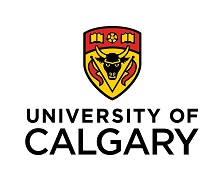

In [29]:
from IPython.display import Image
Image("../Images/Logo.jpg")

# <center>Graduate Project ENEL 698</center>
<center><a href = "https://github.com/isohels/Graduate-Project">Github Link</a></center>

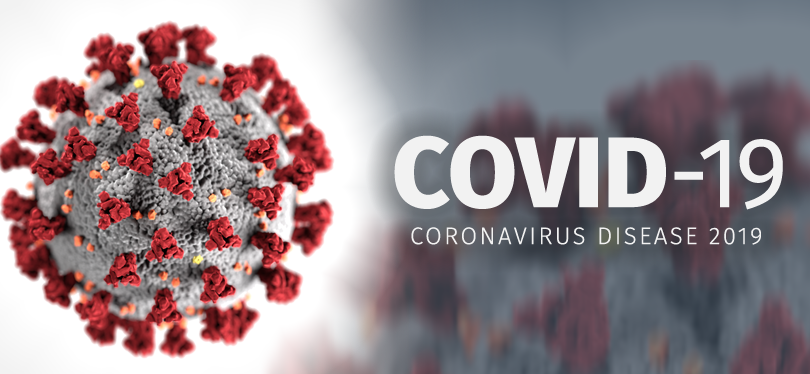

In [30]:
Image("../Images/Covid-19.png")

## This Notebook constitues of analysis of **Effectiveness of Community Contact Reduction** for reducing Coronavirus Disease 2019 (COVID-19) transmission.

## Objective and Scope
### Measures have been included in pandemic response plans to reduce contact between people during an influenza pandemic. Early in a pandemic, restricting the activities of infected individuals could reduce the negative health impact. This analysis aims to assist decision-makers with evidence to support decision-making during pandemic.

 - This analysis will address the following question:
1. This anlaysis will tell us what is the effectiveness of community contact reduction for reducing transmission of COVID-19?
2. This analysis provides information on select interventions (policies and other measures) to stop the spread and improve health outcomes from COVID-19 by jurisdiction (Canada, province and territory).

####  Lets load the intervention scan data (Canada Specific)
- Data Source - <a href = "https://www.cihi.ca/en">For more info please click here</a>.

In [121]:
#importing the necessary files required for visualization and statistical analysis

import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [32]:
intervention_scan = pd.ExcelFile('../covid_data/Data/InterventionScanCanada/covid-19-intervention-scan-data-tables-en.xlsx')

In [33]:
# Its a big datasheet lets see how many sheets it constitutes

print("This dataset contains {} sheets {}.".format(len(intervention_scan.sheet_names), intervention_scan.sheet_names))

This dataset contains 6 sheets ['COVID-19 Intervention Scan', 'Notes to readers', 'Intervention scan', 'Data dictionary', 'Version history', 'Filters'].


#### Loading Individual Sheets

In [34]:
# Parsing Individual sheets to gather data specific information

intervention_scan_data_info = intervention_scan.parse('COVID-19 Intervention Scan')
intervention_scan_data_info.head()

,"Screen reader users: This workbook has 5 worksheets, including this title page, notes to readers on tab 2, an intervention scan on tab 3, a data dictionary on tab 4 and version history on tab 5."
0,COVID-19 Intervention Scan — Data Tables
1,This data table provides information on select interventions (policies and other measures) implemented across Canada to stop the spread and improve health outcomes from COVID-19.\n
2,"Unless otherwise indicated, this product uses data provided by Canada’s federal, provincial and territorial governments as well as provincial and territorial regulatory bodies for select health professions."
3,Additional resources
4,"To learn more about data and information on COVID-19 at the Canadian Institute for Health Information (CIHI), \nsee https://www.cihi.ca/en/covid-19-resources."


In [35]:
pd.set_option('display.max_colwidth', -1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [36]:
intervention_scan_data_info[:3]

,"Screen reader users: This workbook has 5 worksheets, including this title page, notes to readers on tab 2, an intervention scan on tab 3, a data dictionary on tab 4 and version history on tab 5."
0,COVID-19 Intervention Scan — Data Tables
1,This data table provides information on select interventions (policies and other measures) implemented across Canada to stop the spread and improve health outcomes from COVID-19.\n
2,"Unless otherwise indicated, this product uses data provided by Canada’s federal, provincial and territorial governments as well as provincial and territorial regulatory bodies for select health professions."


In [37]:
intervention_scan_notes_to_reader = intervention_scan.parse('Notes to readers')

In [38]:
intervention_scan_notes_to_reader

,Notes to readers
0,"This data table provides information on select interventions (policies and other measures) to stop the spread and improve health outcomes from COVID-19 by jurisdiction (Canada, province and territory)."
1,Data sources
2,"Primary sources of data include announcements of interventions on the following websites: ministry press releases, ministry websites, federal/provincial/territorial public health agency websites, Indigenous organizations as well as provincial and territorial regulatory bodies for health professions. Secondary sources of data include additional links (e.g., media articles, updated releases, and supporting documentation) that provide more information not covered in the primary source."
3,Scope and search strategy
4,"• The scan provides comprehensive information on key health interventions for case finding and management, physical distancing, health workforce capacity, health services and travel restrictions. Contextual information, such as the timing of spring breaks, is also included.\n• The search strategy for this scan is limited to interventions announced or implemented by the federal, provincial and territorial governments, along with regulatory bodies of select health professions. Interventions announced by national Indigenous organizations (e.g., Assembly of First Nations, National Association of Friendship Centres) are also included. \n• Interventions related to Indigenous groups are noted in the Indigenous population group column. \n• Interventions announced below the provincial and territorial level were considered out of scope for the data collection search strategy. In some instances, however, health region or municipal level interventions are included in provincial and territorial announcements and may be tracked in this document. Regional and municipal entries can be identified by filtering by the “Level” column.\n• See Data dictionary tab for more information on the scope and categorization of interventions for this project."
5,Accuracy and maintenance:
6,"• This project started on March 19, 2020. Accuracy is limited by the availability of information and timing of data collection. Previous versions of documents are generally not accessible on ministry websites. Where possible, Internet Archive was used to access old versions of ministry web pages. Some interventions may have been missed because of the timing of this project's initiation, the use of official government press releases as primary sources or the scope of the intervention categories and types. \n• The COVID-19 situation is dynamic. Interventions and links are changing daily, so there may be differences between the current version of official websites and this resource. \n• This scan will be updated to include new or edited content on a regular basis.\n• See Version history tab for date last updated."
7,Keywords
8,"To find other information on this subject, use the following search terms: COVID-19, coronavirus, infectious disease, outbreak, pandemic, case management, closures, openings, health services, health workforce, state of emergency, travel, distancing, public information, financial and economic."
9,Terms of Use


In [39]:
intervention_scan_DataDictionary = intervention_scan.parse('Data dictionary')

In [40]:
intervention_scan_DataDictionary

,Screen reader users: This tab contains 2 tables. The first table is called Table 2: Column attributes. It begins at cell A8 and ends at cell B20. The second table is called Table 3: Intervention attributes. It begins at cell A22 and ends at cell D61.,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Data dictionary,NaN,NaN,NaN
1,"This tab provides a list of variables, intervention types and their descriptions for CIHI's COVID-19 Intervention Scan.",NaN,NaN,NaN
2,Data set description:,COVID-19 Intervention Scan,NaN,NaN
3,Data current to:,2020-06-22 00:00:00,NaN,NaN
4,Update frequency:,Ad hoc,NaN,NaN
5,Publication date:,2020-08-18 00:00:00,NaN,NaN
6,Table 2 Column attributes,NaN,NaN,NaN
7,Variable name,Variable description,NaN,NaN
8,Entry ID,A unique alpha-numeric identifier that allows users of the scan to identify an entry if they have questions about it.,NaN,NaN
9,Jurisdiction,"Jurisdiction covered by the intervention or announcement (i.e., Canada, the province or the territory).",NaN,NaN


In [41]:
intervention_scan_versionhistory = intervention_scan.parse('Version history')

In [42]:
intervention_scan_versionhistory

,Screen reader users: There is 1 table on this tab called Table 4: Version history. It begins at cell A3 and ends at cell B6.,Unnamed: 1
0,Table 4 Version history,NaN
1,Publication date,Changes made
2,2020-06-18 00:00:00,Initial release. Includes announcements up to May 5.
3,2020-07-14 00:00:00,Updated to include announcements up to May 27.
4,2020-08-18 00:00:00,Updated to include announcements up to June 22.


In [43]:
#### Now Lets see the Dataframe

intervention_scan_data = intervention_scan.parse('Intervention scan',header=2)

In [44]:
intervention_scan_data.head(5)

,Entry ID,Jurisdiction,Date announced,Date implemented,Intervention category,Intervention type,Intervention summary,Primary source\n(news release or specific resource),Secondary source,Level,...,Column16364,Column16365,Column16366,Column16367,Column16368,Column16369,Column16370,Column16371,Column16372,Column16373
0,BC007,B.C.,2020-03-15 00:00:00,2020-03-16 00:00:00,Case management,Case management — test criteria,"Who: BC Centre for Disease Control, Provincial Health Services Authority\nWhat: Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.\nEffective until:",http://www.bccdc.ca/health-info/diseases-conditions/covid-19/testing/phases-of-covid-19-testing-in-bc,http://www.bccdc.ca/Health-Professionals-Site/Documents/PHSA-labtesting-archived-summary.pdf,Provincial/territorial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ON021,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ON022,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ON023,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — non-essential services,"Who: Office of the Premier\nWhat: Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ON111,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — daycares,"Who: Office of the Premier\nWhat: Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
intervention_scan_data['Indigenous \npopulation group']

0       No
1       No
2       No
3       No
4       No
        ..
1495    No
1496    No
1497    No
1498    No
1499    No
Name: Indigenous \npopulation group, Length: 1500, dtype: object

In [46]:
intervention_scan_data.columns

Index(['Entry ID', 'Jurisdiction ', 'Date announced', 'Date implemented',
       'Intervention category', 'Intervention type', 'Intervention summary',
       'Primary source\n(news release or specific resource)',
       'Secondary source', 'Level',
       ...
       'Column16364', 'Column16365', 'Column16366', 'Column16367',
       'Column16368', 'Column16369', 'Column16370', 'Column16371',
       'Column16372', 'Column16373'],
      dtype='object', length=16384)

In [47]:
intervention_scan_data = intervention_scan_data.loc[:,:'Indigenous \npopulation group']
print(intervention_scan_data.columns)
intervention_scan_data.head()

Index(['Entry ID', 'Jurisdiction ', 'Date announced', 'Date implemented',
       'Intervention category', 'Intervention type', 'Intervention summary',
       'Primary source\n(news release or specific resource)',
       'Secondary source', 'Level', 'Indigenous \npopulation group'],
      dtype='object')


,Entry ID,Jurisdiction,Date announced,Date implemented,Intervention category,Intervention type,Intervention summary,Primary source\n(news release or specific resource),Secondary source,Level,Indigenous \npopulation group
0,BC007,B.C.,2020-03-15 00:00:00,2020-03-16 00:00:00,Case management,Case management — test criteria,"Who: BC Centre for Disease Control, Provincial Health Services Authority\nWhat: Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.\nEffective until:",http://www.bccdc.ca/health-info/diseases-conditions/covid-19/testing/phases-of-covid-19-testing-in-bc,http://www.bccdc.ca/Health-Professionals-Site/Documents/PHSA-labtesting-archived-summary.pdf,Provincial/territorial,No
1,ON021,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No
2,ON022,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No
3,ON023,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — non-essential services,"Who: Office of the Premier\nWhat: Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No
4,ON111,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — daycares,"Who: Office of the Premier\nWhat: Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No


In [48]:
# Intervention scan jurisdiction

intervention_scan_data['Jurisdiction '].unique()

array(['B.C.', 'Ont.', 'N.S.', 'Que.', 'Sask.', 'Nun.', 'P.E.I.',
       'N.W.T.', 'Man.', 'N.B.', 'N.L.', 'Alta.', 'Y.T.', 'Can.'],
      dtype=object)

In [49]:
# Overall Canada Specific Intervention scan

intervention_scan_data[intervention_scan_data['Jurisdiction ']=='Can.']

,Entry ID,Jurisdiction,Date announced,Date implemented,Intervention category,Intervention type,Intervention summary,Primary source\n(news release or specific resource),Secondary source,Level,Indigenous \npopulation group
88,CAN127,Can.,2020-05-29 00:00:00,2020-05-29 00:00:00,Health workforce,Health workforce — supply management,"Who: Prime Minister\nWhat: Announced $285.1 million to support the ongoing public health response to COVID-19 in Indigenous communities (i.e., fund community-led responses to the pandemic and provide targeted increases in primary health care resources for First Nations communities. In case of outbreaks, this funding can be drawn upon to provide surge capacity and additional support for community-based services in First Nations, Inuit and Métis communities. \nEffective until:",https://pm.gc.ca/en/news/news-releases/2020/05/29/prime-minister-announces-additional-funding-health-economic-and,Not applicable,Federal,Yes
89,CAN128,Can.,2020-05-29 00:00:00,2020-05-29 00:00:00,Travel,Travel — restrictions,"Who: Transport Canada\nWhat: Prohibited cruise ships with overnight accommodations carrying more than 100 persons from operating in Canadian waters and passenger vessels with the capacity to carry more than 12 persons from entering Arctic coastal waters (including Nunatsiavut, Nunavik and the Labrador coast)\nEffective until: 2020-10-31",https://www.canada.ca/en/transport-canada/news/2020/05/minister-garneau-announces-updated-measures-for-cruise-ships-and-passenger-vessels-in-canadian-waters-up-to-october-31-2020.html,Not applicable,Federal,No
90,CAN129,Can.,2020-05-29 00:00:00,2020-07-01 00:00:00,Travel,Travel — restrictions,"Who: Transport Canada\nWhat: Announced that all passenger vessels (with the exception of cruise ships with overnight accomodations) must follow provincial, territorial, local and regional health authority requirements for timelines and processes to resume operations\nEffective until:",https://www.canada.ca/en/transport-canada/news/2020/05/minister-garneau-announces-updated-measures-for-cruise-ships-and-passenger-vessels-in-canadian-waters-up-to-october-31-2020.html,Not applicable,Federal,No
91,CAN130,Can.,2020-05-29 00:00:00,2020-07-01 00:00:00,Travel,Travel — restrictions,"Who: Transport Canada\nWhat: Lifted restriction allowing all passenger vessels (with the exception of cruise ships with overnight accomodations) to operate in inland rivers and lakes in the N.W.T., Nun. and Y.T.\nEffective until:",https://www.canada.ca/en/transport-canada/news/2020/05/minister-garneau-announces-updated-measures-for-cruise-ships-and-passenger-vessels-in-canadian-waters-up-to-october-31-2020.html,Not applicable,Federal,No
134,CAN131,Can.,2020-06-03 00:00:00,2020-06-04 00:00:00,Public information,Public information — masks,"Who: Transport Canada\nWhat: Expanded the requirements for the use of face coverings by workers and others involved in the transportation system (e.g., flight crew and airport workers) \nEffective until:",https://www.canada.ca/en/transport-canada/news/2020/06/minister-garneau-announces-new-measures-for-the-use-of-face-coverings-in-the-canadian-transportation-sector.html,Not applicable,Federal,No
...,...,...,...,...,...,...,...,...,...,...,...
1429,CAN072,Can.,No data,No data,Public information,Public information,Who: Public Health Agency of Canada\nWhat: Launched a dedicated government web page for COVID-19\nEffective until:\n,https://web.archive.org/web/20200125011050/https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html,Not applicable,Federal,No
1430,CAN078,Can.,No data,No data,Case management,Case management — self-isolation,Who: Public Health Agency of Canada\nWhat: Published fact sheet on how to self-isolate for those diagnosed with COVID-19 \nEffective until:,https://www.canada.ca/en/public-health/services/publications/diseases-conditions/covid-19-how-to-isolate-at-home.html,Not applicable,Federal,NO
1431,CAN079,Can.,No data,No data,Case

In [50]:
# Slicing Intervention Summary to get Who implemented the policy what was the policy and how long it will be effective.

Intervention_summary = intervention_scan_data['Intervention summary'].str.split("Who: |\nWhat: |\nEffective until:",
                                                                                expand=True)

In [51]:
# Sliced Columns are expanded into individual columns.

Intervention_summary.rename(columns={1: "Who Implemented", 2: "What Implemented", 3: "Effective Until"},
                            inplace = True)
Intervention_summary.head()

,0,Who Implemented,What Implemented,Effective Until
0,,"BC Centre for Disease Control, Provincial Health Services Authority",Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.,
1,,Office of the Premier,"Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)",2020-06-12
2,,Office of the Premier,"Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)",2020-06-12
3,,Office of the Premier,"Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)",2020-06-12
4,,Office of the Premier,"Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)",2020-06-12


In [52]:
# concatinating intervention_scan data and intervention summary data.

intervention_scan_data = pd.concat([intervention_scan_data,Intervention_summary],axis=1)
intervention_scan_data.head()

,Entry ID,Jurisdiction,Date announced,Date implemented,Intervention category,Intervention type,Intervention summary,Primary source\n(news release or specific resource),Secondary source,Level,Indigenous \npopulation group,0,Who Implemented,What Implemented,Effective Until
0,BC007,B.C.,2020-03-15 00:00:00,2020-03-16 00:00:00,Case management,Case management — test criteria,"Who: BC Centre for Disease Control, Provincial Health Services Authority\nWhat: Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.\nEffective until:",http://www.bccdc.ca/health-info/diseases-conditions/covid-19/testing/phases-of-covid-19-testing-in-bc,http://www.bccdc.ca/Health-Professionals-Site/Documents/PHSA-labtesting-archived-summary.pdf,Provincial/territorial,No,,"BC Centre for Disease Control, Provincial Health Services Authority",Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.,
1,ON021,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No,,Office of the Premier,"Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)",2020-06-12
2,ON022,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No,,Office of the Premier,"Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)",2020-06-12
3,ON023,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — non-essential services,"Who: Office of the Premier\nWhat: Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No,,Office of the Premier,"Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)",2020-06-12
4,ON111,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — daycares,"Who: Office of the Premier\nWhat: Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://w

In [53]:
# Dropping Secondary source

intervention_scan_data.drop(['Secondary source',0],axis=1,inplace=True)

In [54]:
# Renaming the columns

intervention_scan_data.rename(columns = {"Indigenous \npopulation group": "Indigenous population group",'Primary source\n(news release or specific resource)': 'Primary source'},inplace=True)
intervention_scan_data.head()

,Entry ID,Jurisdiction,Date announced,Date implemented,Intervention category,Intervention type,Intervention summary,Primary source,Level,Indigenous population group,Who Implemented,What Implemented,Effective Until
0,BC007,B.C.,2020-03-15 00:00:00,2020-03-16 00:00:00,Case management,Case management — test criteria,"Who: BC Centre for Disease Control, Provincial Health Services Authority\nWhat: Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.\nEffective until:",http://www.bccdc.ca/health-info/diseases-conditions/covid-19/testing/phases-of-covid-19-testing-in-bc,Provincial/territorial,No,"BC Centre for Disease Control, Provincial Health Services Authority",Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.,
1,ON021,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,Provincial/territorial,No,Office of the Premier,"Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)",2020-06-12
2,ON022,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,Provincial/territorial,No,Office of the Premier,"Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)",2020-06-12
3,ON023,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — non-essential services,"Who: Office of the Premier\nWhat: Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,Provincial/territorial,No,Office of the Premier,"Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)",2020-06-12
4,ON111,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — daycares,"Who: Office of the Premier\nWhat: Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,Provincial/territorial,No,Office of the Premier,"Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)",2020-06-12


In [56]:
#converting the date column to datetime format and extracting month from it.

intervention_scan_data[intervention_scan_data['Date announced']=='No data']

DateColumns = ['Date announced','Date implemented', 'Effective Until']

for column in DateColumns:

    intervention_scan_data[column] = pd.to_datetime(intervention_scan_data[column], infer_datetime_format=True,errors='coerce')
#intervention_scan_data['Date implemented'] = pd.to_datetime(intervention_scan_data['Date implemented'], infer_datetime_format=True,errors='coerce')
#intervention_scan_data['Effective Until'] = pd.to_datetime(intervention_scan_data['Effective Until'], infer_datetime_format=True,errors='coerce')

In [57]:
# Rearranging the columns

intervention_scan_data = intervention_scan_data[['Entry ID', 'Jurisdiction ','Level','Date announced','Date implemented',
                                                 'Intervention category','Intervention type','Who Implemented',
                                                 'What Implemented','Effective Until','Indigenous population group',
                                                 'Primary source']]

intervention_scan_data.head()

,Entry ID,Jurisdiction,Level,Date announced,Date implemented,Intervention category,Intervention type,Who Implemented,What Implemented,Effective Until,Indigenous population group,Primary source
0,BC007,B.C.,Provincial/territorial,2020-03-15,2020-03-16,Case management,Case management — test criteria,"BC Centre for Disease Control, Provincial Health Services Authority",Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.,NaT,No,http://www.bccdc.ca/health-info/diseases-conditions/covid-19/testing/phases-of-covid-19-testing-in-bc
1,ON021,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — recreation,Office of the Premier,"Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html
2,ON022,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — recreation,Office of the Premier,"Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html
3,ON023,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — non-essential services,Office of the Premier,"Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html
4,ON111,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — daycares,Office of the Premier,"Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html


#### Intervention category by level

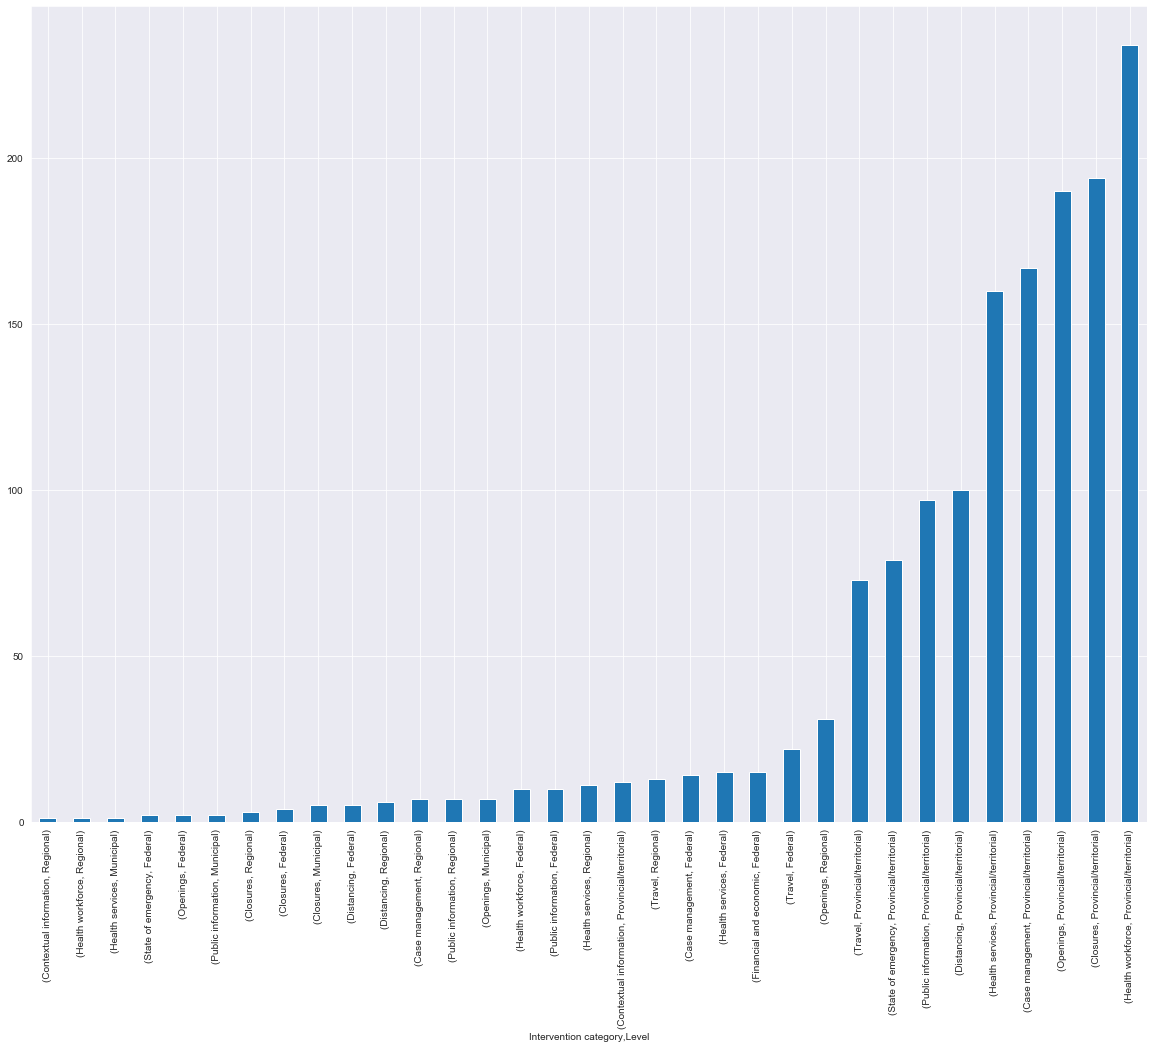

In [58]:
# Lets see which intervention category has been implemented the most.

plt.figure(figsize=(20,15))
sns.set_style("darkgrid")
intervention_scan_data.groupby(['Intervention category','Level']).size().sort_values().plot.bar()

 - Here we can see that health workforce, closures, case management, health services, distancing, travel were mostly implemented. They were implemented by either provincial/territorial, federal, municipal, regional.

#### Intervention Level

Level
Municipal                 15  
Regional                  80  
Federal                   99  
Provincial/territorial    1306
dtype: int64


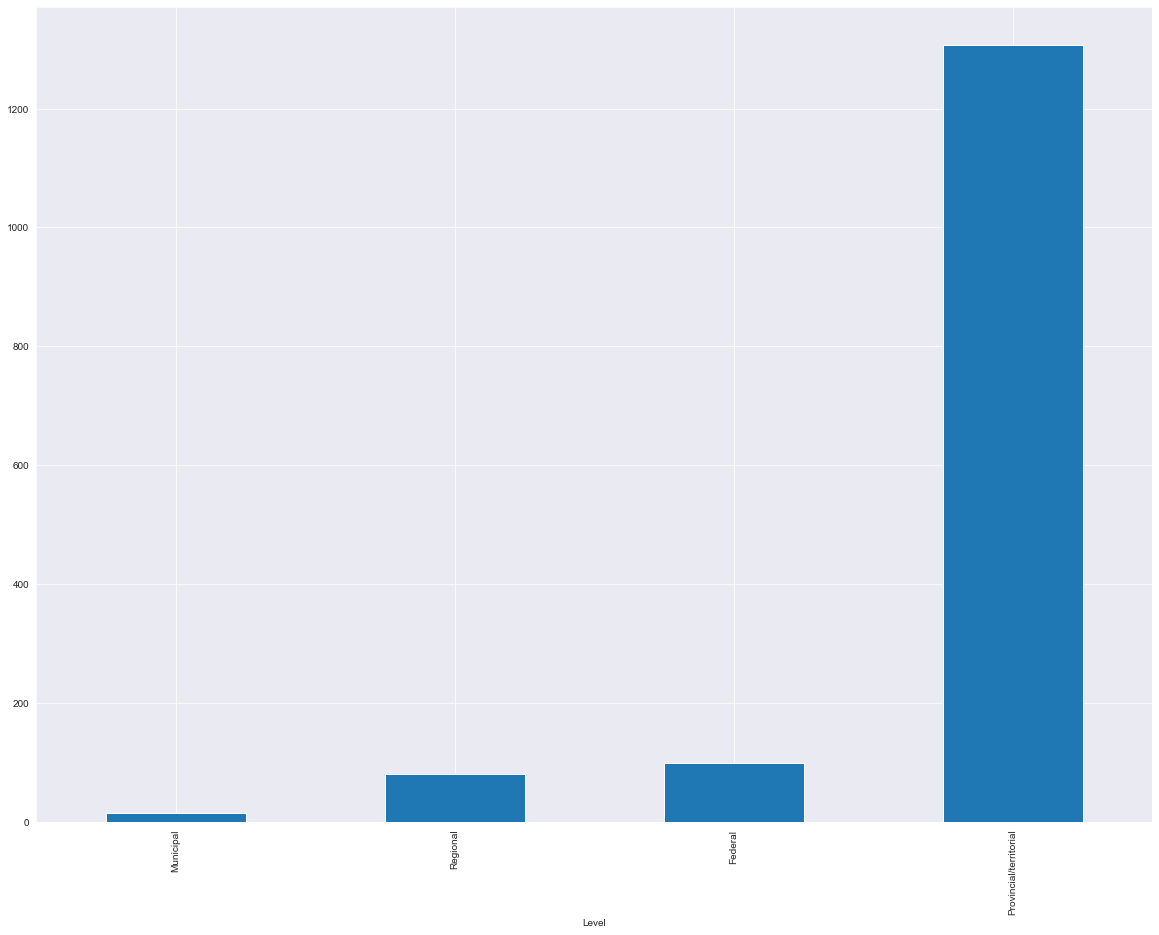

In [59]:
# Lets see at which level the interventions got implemented
intervention_level = intervention_scan_data.groupby('Level').size().sort_values()
print(intervention_level)

plt.figure(figsize=(20,15))
intervention_scan_data.groupby('Level').size().sort_values().plot(kind='bar')

 - Here we can see that mostly policies were implemented by provincial/territorial. Municipal department is least likely to implement the policies.

#### Federal categories

Intervention category
Openings                  2 
State of emergency        2 
Closures                  4 
Distancing                5 
Health workforce          10
Public information        10
Case management           14
Financial and economic    15
Health services           15
Travel                    22
dtype: int64


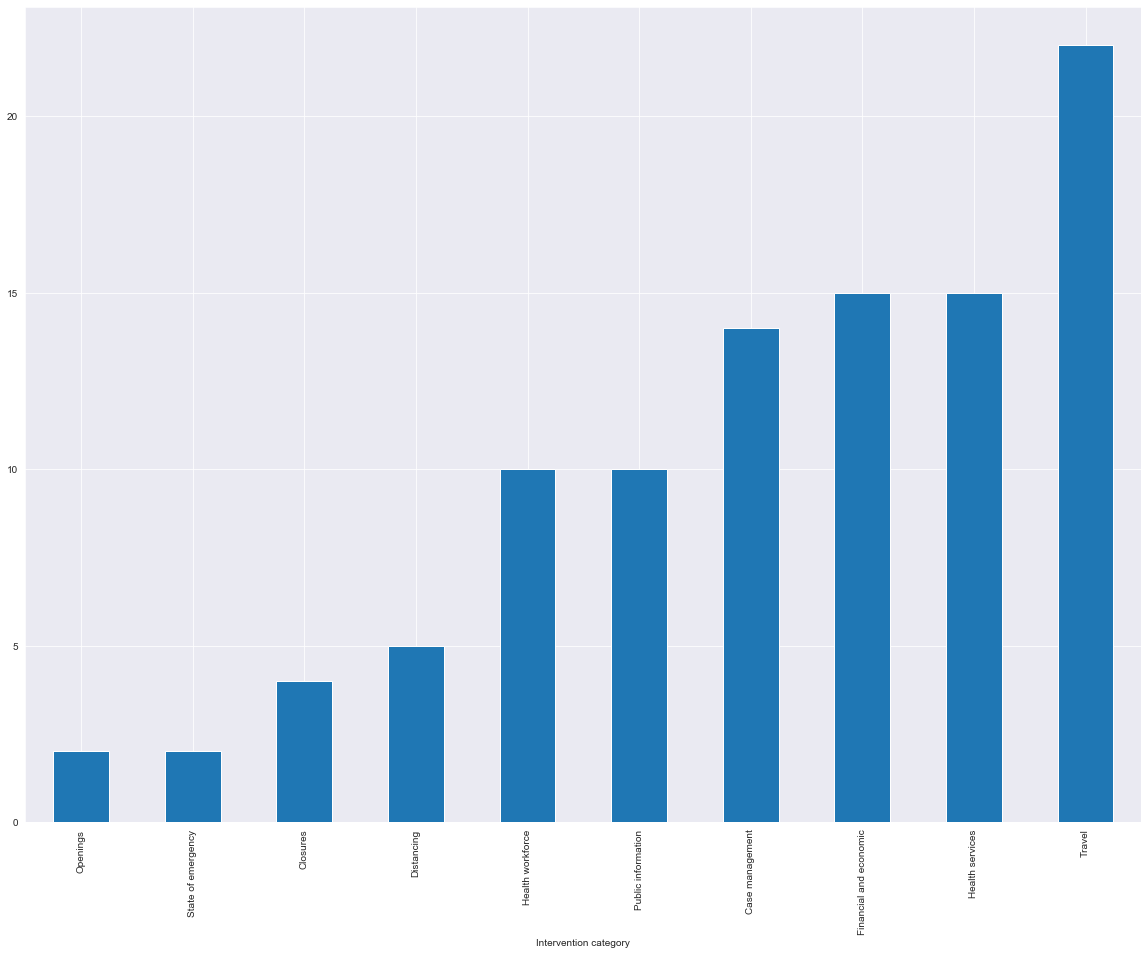

In [60]:
federal_category = intervention_scan_data[intervention_scan_data['Level']=='Federal']
federal_category_size = federal_category.groupby('Intervention category').size().sort_values()
print(federal_category_size)

plt.figure(figsize=(20,15))
federal_category_size.plot.bar()

#### Provincial Categories

Intervention category
Contextual information    12 
Travel                    73 
State of emergency        79 
Public information        97 
Distancing                100
Health services           160
Case management           167
Openings                  190
Closures                  194
Health workforce          234
dtype: int64


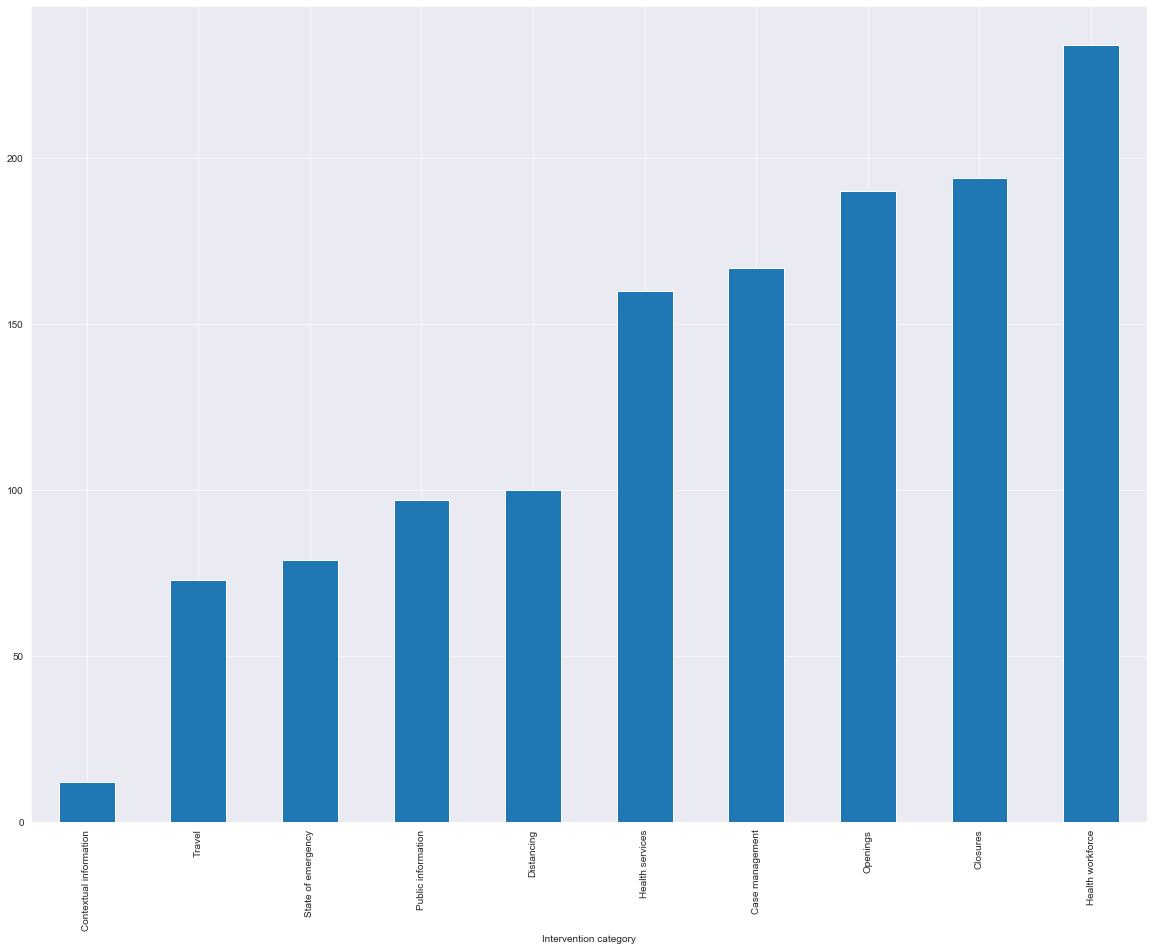

In [61]:
# Intervention categories by level

provincial_category = intervention_scan_data[intervention_scan_data['Level']=='Provincial/territorial']
provincial_category_size = provincial_category.groupby('Intervention category').size().sort_values()
print(provincial_category_size)

plt.figure(figsize=(20,15))
provincial_category_size.plot.bar()

#### Regional Categories

Intervention category
Contextual information    1 
Health workforce          1 
Closures                  3 
Distancing                6 
Case management           7 
Public information        7 
Health services           11
Travel                    13
Openings                  31
dtype: int64


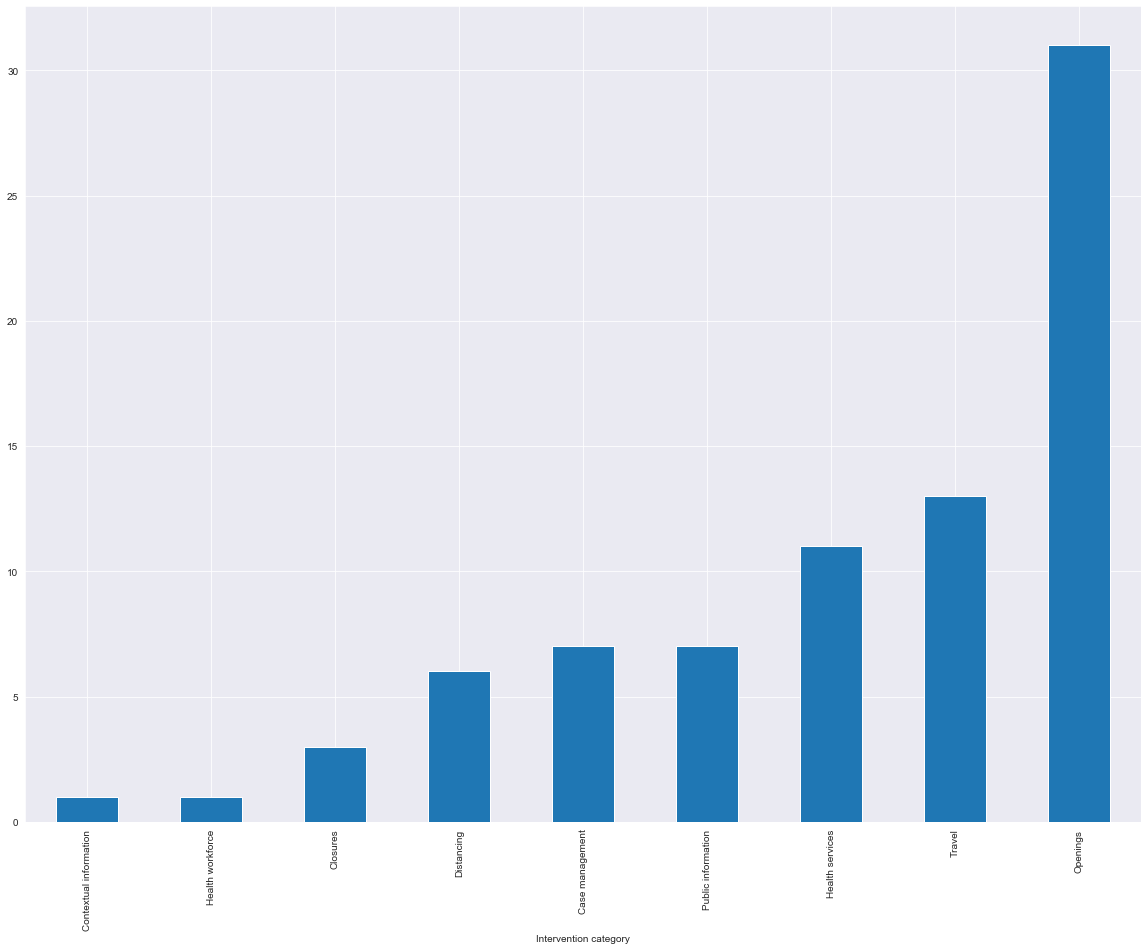

In [62]:
# Regional Categories

regional_category = intervention_scan_data[intervention_scan_data['Level']=='Regional']
regional_category_size = regional_category.groupby('Intervention category').size().sort_values()
print(regional_category_size)

plt.figure(figsize=(20,15))
regional_category_size.plot.bar()

#### Municipal Categories

Intervention category
Health services       1
Public information    2
Closures              5
Openings              7
dtype: int64


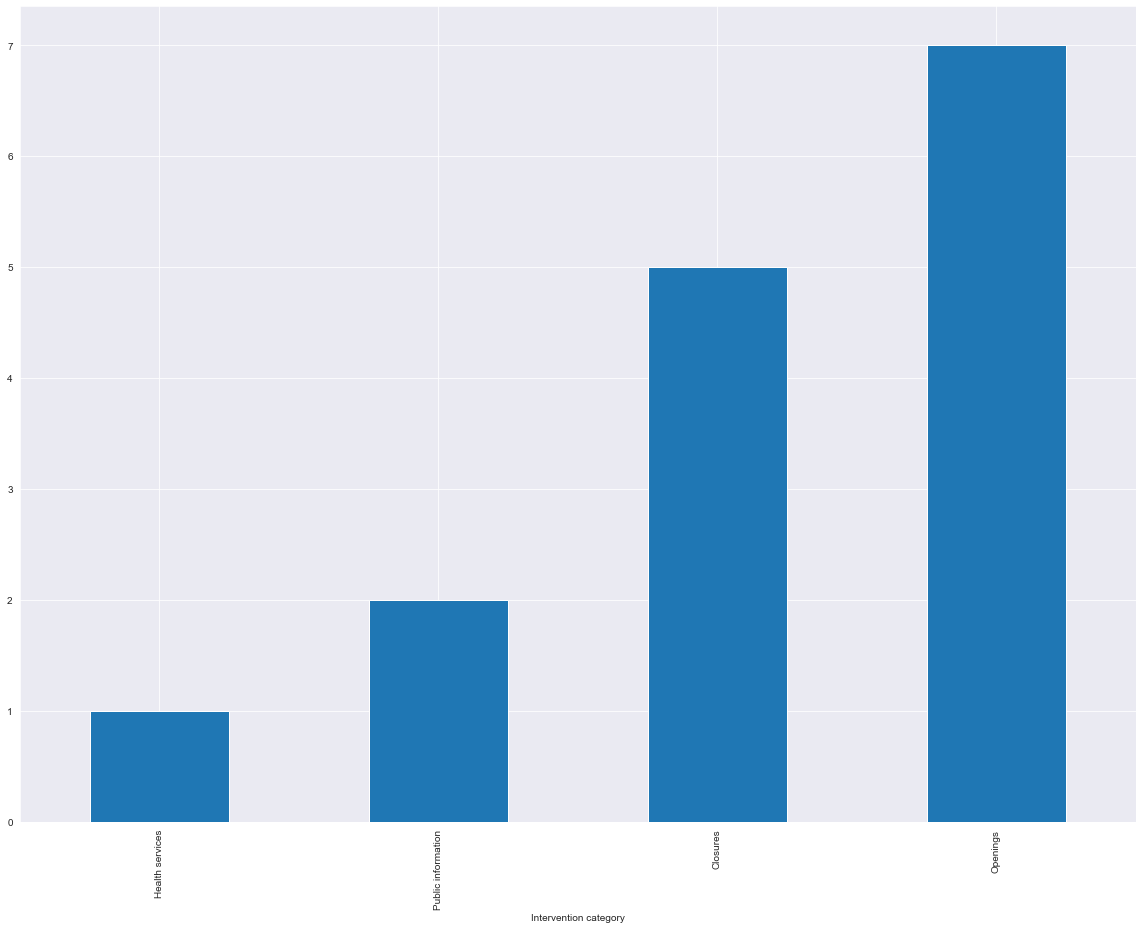

In [63]:
# Municipal Categories

municipal_category = intervention_scan_data[intervention_scan_data['Level']=='Municipal']
municipal_category_size = municipal_category.groupby('Intervention category').size().sort_values()
print(municipal_category_size)

plt.figure(figsize=(20,15))
municipal_category_size.plot.bar()

#### Intervention category by date

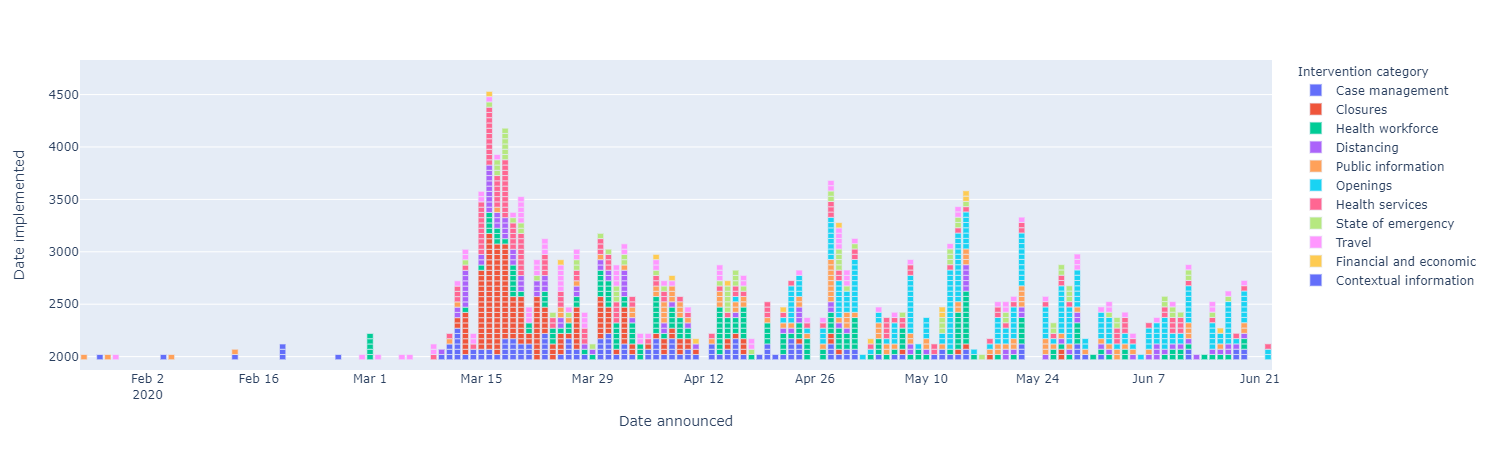

In [101]:
# Intervention Category by date

px.bar(intervention_scan_data, y='Date implemented', x = 'Date announced', color='Intervention category')

 - Here we can see in the early months **Case management, Travel, Public information** were implemented. The reason were massive failures of judgement and inaction in January, February, and even March of this year.
 - After month of march when respective governments saw significant rise in number of cases of COVID-19, then majority of intervention categories were implemented. Most commonly used is closures nationwide along with other measures.

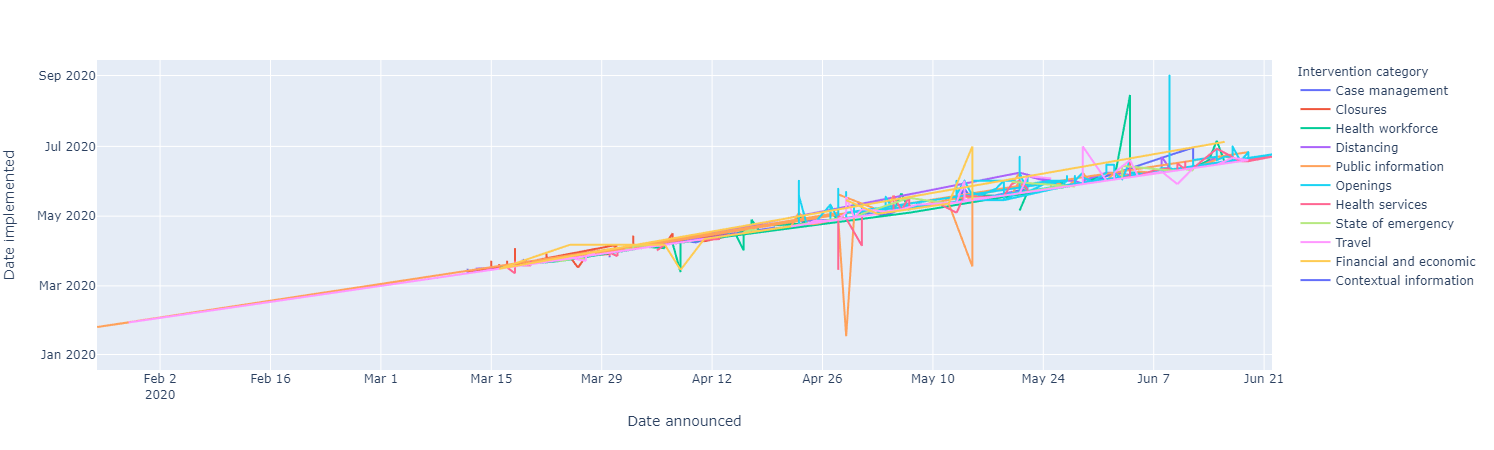

In [98]:
px.line(intervention_scan_data, x = 'Date announced', y = 'Date implemented', color='Intervention category')

#### Time difference between the date announced and date implemented

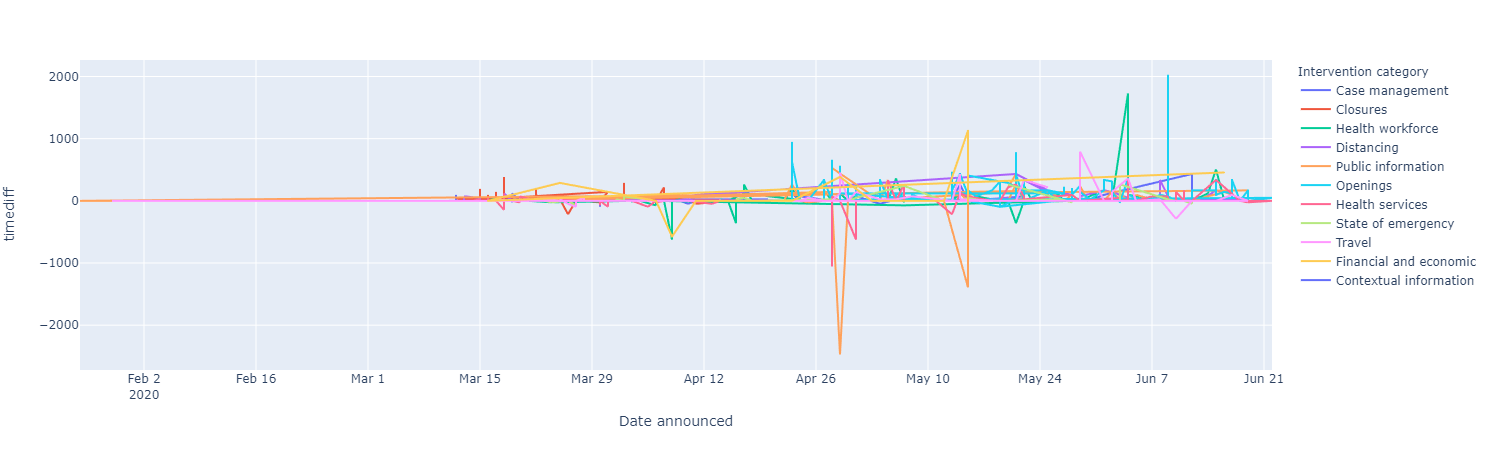

In [102]:
# Time difference between date announced and date implemented.

intervention_scan_data['timediff'] = ((intervention_scan_data['Date implemented'] - intervention_scan_data['Date announced']).dt.total_seconds().fillna(0))//3600

# Timediff between date announced and date implemented

px.line(intervention_scan_data, x = 'Date announced', y = 'timediff', color = 'Intervention category')

 - This graph shows a horizontal line from which we can state the most of the intervention categories were implemented straight away.
 - The interesting fact here is some of the policies were implemented first and then announced (ex: **Public Information, Health services, and Travel**)
 - Another interesting takeway from here is some of the policies have lag time more than **25 days** (ex: **Travel, Openings, Health workforce**). There is no real reason for that, but government might want to keep a check on the situation of COVID-19 before opening the closures or removing travel restrictions.

#### Duration of various policies to be in effect

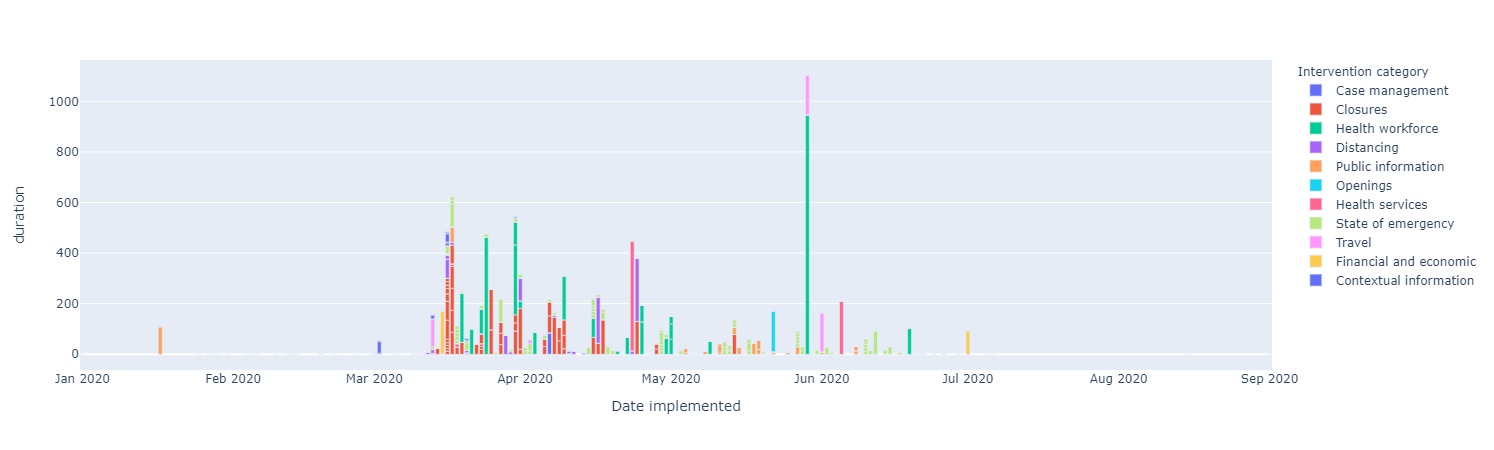

In [145]:
# How long a intervention category is effective.

intervention_scan_data['duration'] = ((intervention_scan_data['Effective Until'] - intervention_scan_data['Date implemented']).dt.total_seconds().fillna(0))//(3600*24)
px.bar(intervention_scan_data, x = 'Date implemented', y = 'duration', color= 'Intervention category')

#### Mean of the duration of various policies

In [152]:
x = intervention_scan_data['duration'].mean()
print("Mean of duration is: {}".format(x))

Mean of duration is: 6.9046666666666665


 - Mean of the intervention types is around **7 months**. 
 - Here we can see health workforce policies are there for maximum amount of time, after that comes closures across nation.
 - **Travel restrictions** are upto **5 months**.
 - **Social Distancing** also upto **8 months** in some provinces

#### Who Implemented

#### Number of Authorities involved

In [187]:
# Preprocessing of data for generating word cloud.

intervention_scan_data['Who Implemented'] = intervention_scan_data['Who Implemented'].astype('str')

text = " ".join(who for who in intervention_scan_data['Who Implemented'])
print("There are {} number of authorities across canada who implemented various policies.". format(intervention_scan_data['Who Implemented'].nunique()))

There are 422 number of authorities across canada who implemented various policies.


In [182]:
# Here we are downloading Wordcloud to create wordcloud based on the column values using textmining

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

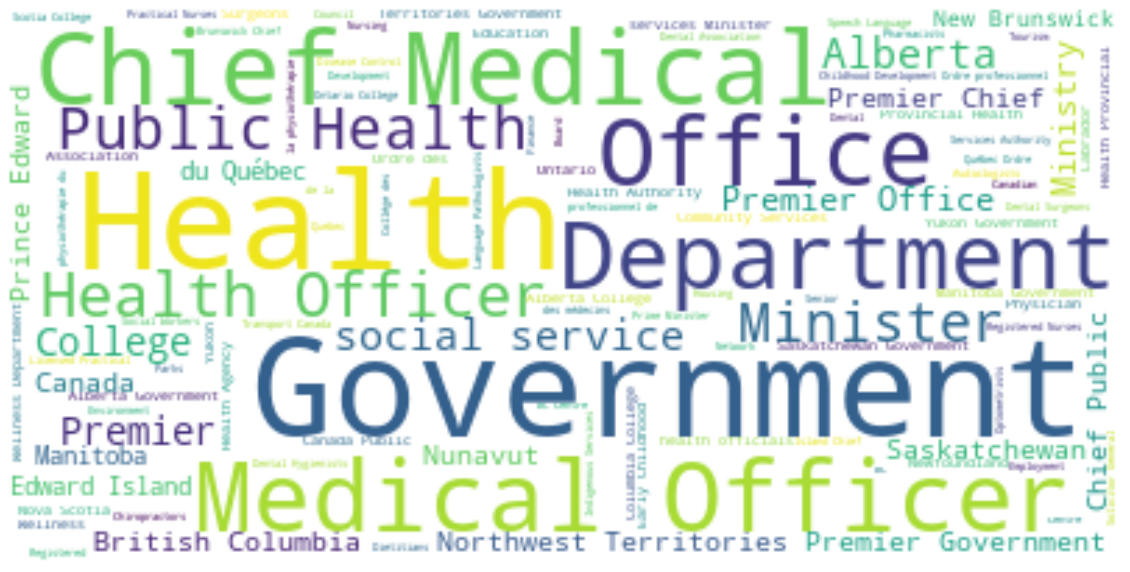

In [206]:
# generating Wordcloud based on the frequency of word.

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["of",","])

wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords, max_font_size=50,
            contour_width=3, contour_color='firebrick')
wc.generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

 - The boldness of the word describes its weight(Frequency in the text.)
 - We can see here most of the policies were implemented by respected Government.
 - **Province health agency, Health officer, Premier Office, College officials, Chief Medical Officer** were among the major policy makers, or we can say who implemented the policies.
 - This pandemic is complex along with its, multiple consequences, governments have had to adapt quickly and ensure that appropriate capacity for co-ordination was in place. Some Emergency institutional arrangements to deal with the coronavirus (COVID-19) pandemic that are implemented by the government officials:
  1. Ad hoc arrangements.
  2. Existing structures adapted to the crisis.
  3. Temporary structures provided for by crisis-management plans, policies or laws on national security.
  4. a hybrid approach, combining two or more above mentioned arrangements.

#### What Implemented ?

#### Number of the policies Implemented

In [207]:
intervention_scan_data['What Implemented'] = intervention_scan_data['What Implemented'].astype('str')
text = " ".join(who for who in intervention_scan_data['What Implemented'])
print("There are {} number of policies, which were implemented by above mentioned officials.". format(intervention_scan_data['What Implemented'].nunique()))

There are 1368 number of policies, which were implemented by above mentioned officials.


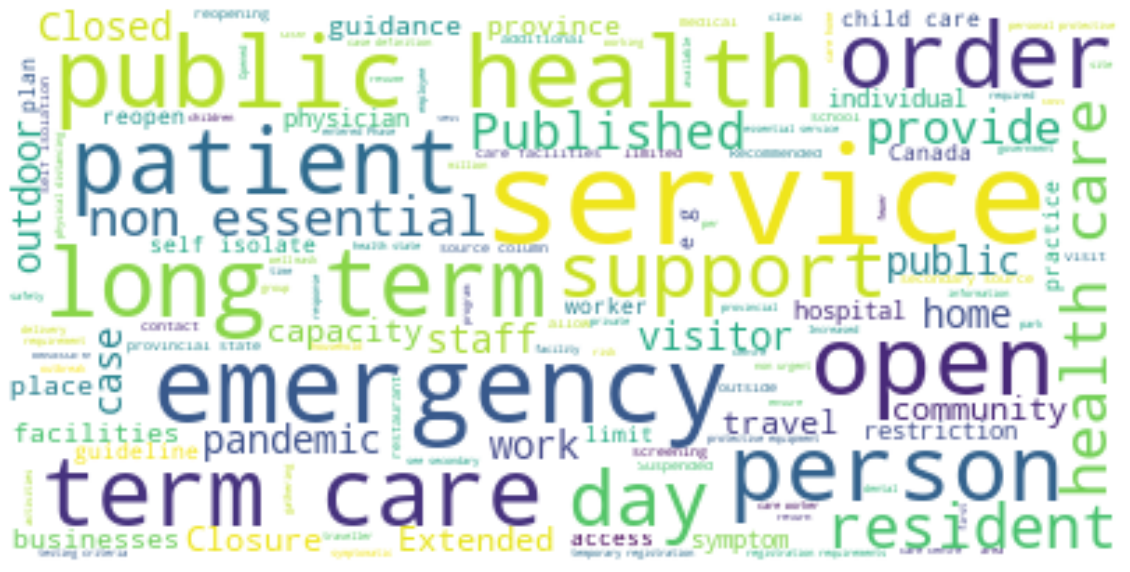

In [217]:
# generating Wordcloud based on the frequency of word.

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["of",",",";","a","an","or","is","for","are","with","to","be","all","(see secondary source column)",
                  "apply","including","COVID","people","include","Launched","region","will","Updated","may",
                  "new","Permitted","must","Issued","source column","Announced","provided","released"])

wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords, max_font_size=50,
            contour_width=3, contour_color='firebrick')
wc.generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

 -  Most common implmented policiy words can be seen in the above wordcloud, and based on the previous knowledge we can derive some of the following policies:
  1. Long term closure.
  2. Support for health workforce.
  3. Community support.
  4. Workplace restrictions.
  5. Travel restrictions.
  6. Community restrictions.
  7. Outdoor restrictions.
  8. Facilities guidelines.
  9. Public health care facilities.
  10. Self isolation.
  11. Patient care.
  12. Reopening of the closures.

#### Policies Effect on Number of Covid cases

In [221]:
canada_covid_df = pd.read_csv("../covid_data/Data/Covid-19/covid19.csv")
canada_covid_df

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14
0,35,Ontario,Ontario,31-01-2020,3,0,0.0,3,NaN,NaN,...,0.00,NaN,NaN,100.00,3.0,0.02,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0.0,1,NaN,NaN,...,0.00,NaN,NaN,100.00,1.0,0.02,NaN,NaN,NaN,NaN
2,1,Canada,Canada,31-01-2020,4,0,0.0,4,NaN,NaN,...,0.00,NaN,NaN,100.00,4.0,0.01,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,08-02-2020,3,0,0.0,3,NaN,NaN,...,0.00,NaN,NaN,100.00,3.0,0.02,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0.0,4,NaN,NaN,...,0.00,NaN,NaN,100.00,4.0,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,60,Yukon,Yukon,19-09-2020,15,0,0.0,15,3049.0,15.0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
2948,61,Northwest Territories,Territoires du Nord-Ouest,19-09-2020,5,0,0.0,5,3944.0,5.0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
2949,62,Nunavut,Nunavut,19-09-2020,0,0,0.0,0,2198.0,0.0,...,NaN,20.0,0.0,NaN,NaN,0.00,0.0,0.00,0.0,0.00
2950,99,Repatriated travellers,Voyageurs rapatriés,19-09-2020,13,8,0.0,13,76.0,13.0,...,0.00,0.0,0.0,0.00,0.0,NaN,0.0,NaN,0.0,NaN


In [222]:
canada_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pruid              2952 non-null   int64  
 1   prname             2952 non-null   object 
 2   prnameFR           2952 non-null   object 
 3   date               2952 non-null   object 
 4   numconf            2952 non-null   int64  
 5   numprob            2952 non-null   int64  
 6   numdeaths          2833 non-null   float64
 7   numtotal           2952 non-null   int64  
 8   numtested          2895 non-null   float64
 9   numrecover         2428 non-null   float64
 10  percentrecover     2271 non-null   float64
 11  ratetested         2690 non-null   float64
 12  numtoday           2952 non-null   int64  
 13  percentoday        2952 non-null   float64
 14  ratetotal          2759 non-null   float64
 15  ratedeaths         2759 non-null   float64
 16  numdeathstoday     2833 

In [223]:
#converting the date column to datetime format and extracting month from it.

from datetime import datetime

canada_covid_df['date'] = pd.to_datetime(canada_covid_df['date'], infer_datetime_format=True)

In [224]:
canada_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pruid              2952 non-null   int64         
 1   prname             2952 non-null   object        
 2   prnameFR           2952 non-null   object        
 3   date               2952 non-null   datetime64[ns]
 4   numconf            2952 non-null   int64         
 5   numprob            2952 non-null   int64         
 6   numdeaths          2833 non-null   float64       
 7   numtotal           2952 non-null   int64         
 8   numtested          2895 non-null   float64       
 9   numrecover         2428 non-null   float64       
 10  percentrecover     2271 non-null   float64       
 11  ratetested         2690 non-null   float64       
 12  numtoday           2952 non-null   int64         
 13  percentoday        2952 non-null   float64       
 14  ratetota

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

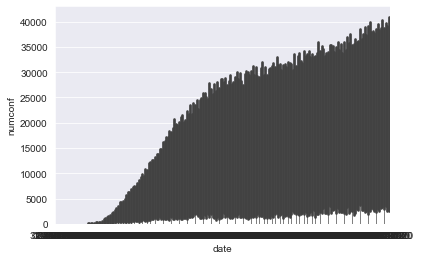

In [266]:
sns.barplot(x=canada_covid_cases['date'],y=canada_covid_cases['numconf'],color='grey',data = canada_covid_cases)
sns.barplot(x=intervention_scan_data['Date announced'],y=intervention_scan_data['Date implemented'],data = intervention_scan_data)

In [275]:
combined_df = pd.DataFrame()
combined_df[['Date announced','numconf']] = canada_covid_cases[['date','numconf']]

In [279]:
pd.concat(canada_covid_cases[['date','numconf']],intervention_scan_data[['Date announced','Date implemented', 'Intervention category']])

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"